# **Installations:**

In [1]:
!pip install config
!pip install shap # For Model Interpretability.
!pip install spacy # For extracting nouns.
!pip install en_core_web_md # Also for extracting nouns.
!pip install DframCy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 7.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement en_core_web_md (from versions: none)
ERROR: No matching distribution found for en_core_web_md
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 143 kB 10.6 MB/s 
     |████████████████████████████████| 217 kB 63.0 MB/s 
     |████████████████████████████████| 316 kB 65.8 MB/s 
     |████████████████████████████████| 298 kB 47.5 MB/s 
     |████████████████████████████████| 297 kB 63.0 MB/s 
 

# **Imports:**

In [2]:
import pandas as pd  # To read the csv file to a data frame.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import config
import os
from datetime import datetime
import shap

import spacy # For extracting nouns.
import en_core_web_sm # Also for extracting nouns.
from dframcy import DframCy # For converting Spacy to Pandas.

Can't initialize NVML


In [3]:
# Imported libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Data Upload:**

Import excel edited data frame updated with zeroes.

In [5]:
df_comments_pcs_depression_per_month_year = pd.read_csv ('/comments_pcs_depression_per_month_year_with_split comments_no_zeros.csv')
df_comments_pcs_depression_per_month_year

,Month_in_Year,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined,Monthly_PCS_Comments_Combined,Monthly_Depression_Comments_Combined
0,2015-12,2,1,1,"'fucking dead . went x ray , saw external had ...","'fucking dead . went x ray , saw external had ...",'if got away telling entire squadron go fuck c...
1,2016-01,0,0,0,NaN,NaN,NaN
2,2016-02,3,2,1,`` op . lot shift replies thread . let please ...,`` op . lot shift replies thread . let please ...,'there decent number jobs require clearance . ...
3,2016-03,6,3,3,'that mentality ended promoting buddy mine stu...,"' would take either want instructor , job woul...",'that mentality ended promoting buddy mine stu...
4,2016-04,2,1,1,'but get ccf ? '' month thing seen firetruck c...,' month thing seen firetruck called 335 cause ...,'but get ccf ? '
...,...,...,...,...,...,...,...
69,2021-09,2,0,2,' imagine young airman spending hundreds dolla...,NaN,' imagine young airman spending hundreds dolla...
70,2021-10,4,3,1,'shaped like pyramid scheme ''another question...,'shaped like pyramid scheme ''another question...,'is two roller bags much ? know pack less requ...
71,2021-11,0,0,0,NaN,NaN,NaN
72,2021-12,1,1,0,'revisit idea finish bottom via willing take j...,'revisit idea finish bottom via willing take j...,NaN


* 4 Techniques to Handle Missing values in Time Series Data
  * https://towardsdatascience.com/4-techniques-to-handle-missing-values-in-time-series-data-c3568589b5a8 

In [6]:
df_comments_pcs_depression_per_month_year['Monthly_PCS_Comments_Combined'] = df_comments_pcs_depression_per_month_year['Monthly_PCS_Comments_Combined'].fillna('0')
df_comments_pcs_depression_per_month_year # Last Observation Carried Forward.


,Month_in_Year,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined,Monthly_PCS_Comments_Combined,Monthly_Depression_Comments_Combined
0,2015-12,2,1,1,"'fucking dead . went x ray , saw external had ...","'fucking dead . went x ray , saw external had ...",'if got away telling entire squadron go fuck c...
1,2016-01,0,0,0,NaN,0,NaN
2,2016-02,3,2,1,`` op . lot shift replies thread . let please ...,`` op . lot shift replies thread . let please ...,'there decent number jobs require clearance . ...
3,2016-03,6,3,3,'that mentality ended promoting buddy mine stu...,"' would take either want instructor , job woul...",'that mentality ended promoting buddy mine stu...
4,2016-04,2,1,1,'but get ccf ? '' month thing seen firetruck c...,' month thing seen firetruck called 335 cause ...,'but get ccf ? '
...,...,...,...,...,...,...,...
69,2021-09,2,0,2,' imagine young airman spending hundreds dolla...,0,' imagine young airman spending hundreds dolla...
70,2021-10,4,3,1,'shaped like pyramid scheme ''another question...,'shaped like pyramid scheme ''another question...,'is two roller bags much ? know pack less requ...
71,2021-11,0,0,0,NaN,0,NaN
72,2021-12,1,1,0,'revisit idea finish bottom via willing take j...,'revisit idea finish bottom via willing take j...,NaN


In [7]:
# Save and download most recent dataframe:
from google.colab import files
df_comments_pcs_depression_per_month_year.to_csv('pcs_depression_combined_monthly_texts.csv', encoding = 'utf-8-sig') 
files.download('pcs_depression_combined_monthly_texts.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Vectorize PCS comments to convert text to numerical variables for Regression and SHAP input:

* CountVectorizer
  * https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html 
    * Convert a collection of text documents to a matrix of token counts.
  * Using CountVectorizer to Extracting Features from Text
    * https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
      * "CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample."

In [8]:
# Vectorize Monthly_PCS_Comments_Combined: 
PCS_document_features = df_comments_pcs_depression_per_month_year['Monthly_PCS_Comments_Combined']
PCS_vectorizer = CountVectorizer()
PCS_documents_as_input_vector = PCS_vectorizer.fit_transform(PCS_document_features)

Correlation analysis

In [9]:
df_depression = df_comments_pcs_depression_per_month_year['Depression_Comments_per_Month_in_Year']

* pandas.DataFrame.sparse.from_spmatrix
  * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sparse.from_spmatrix.html 
* pandas.DataFrame.join
  * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [10]:
import scipy.sparse
mat = PCS_documents_as_input_vector
df_vectorizer = pd.DataFrame.sparse.from_spmatrix(mat)
df_vectorizer

,0,1,2,3,4,5,6,7,8,9,...,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_vectorizer_dep = df_vectorizer.join(df_depression)
df_vectorizer_dep

,0,1,2,3,4,5,6,7,8,9,...,1114,1115,1116,1117,1118,1119,1120,1121,1122,Depression_Comments_per_Month_in_Year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from google.colab import files
df_vectorizer_dep.to_csv('vectorizer_dep.csv', encoding = 'utf-8-sig') 
files.download('vectorizer_dep.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import seaborn as sb
import seaborn as sns

In [13]:
from scipy.stats import norm

Exploring Correlation in Python
* https://www.geeksforgeeks.org/exploring-correlation-in-python/

In [14]:
from pandas.core.groupby.ops import Shape

# Establish independent variable as PCS comments per month in year and PCS documents as input vector.
x = PCS_documents_as_input_vector
# Establish dependent variable as depression comments per month in year.
y = df_comments_pcs_depression_per_month_year['Depression_Comments_per_Month_in_Year']
# Splits training and testing data.
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state=2)

In [15]:
# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
linear_regression_model = reg.fit(x_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  

Coefficients:  [-0.01616722 -0.00346291 -0.00346291 ...  0.19230769  0.21827197
 -0.00346291]


In [19]:
linear_regression_model.score(x_test, y_test)

0.8363137682933433

* Coefficient of determination
  * https://en.wikipedia.org/wiki/Coefficient_of_determination
  * Data Science One on One — Part 19: Interpreting Regression Output
    * https://medium.com/@polanitzer/data-science-one-on-one-part-19-interpreting-regression-output-in-excel-fc7d49be63f
      * "The coefficient of multiple correlation is simply the square root of R-squared. In the case of a multiple regression, the coefficient of multiple correlation is always positive."
* Coefficient of multiple correlation
  * https://en.wikipedia.org/wiki/Coefficient_of_multiple_correlation 
    * "In statistics, the coefficient of multiple correlation is a measure of how well a given variable can be predicted using a linear function of a set of other variables. It is the correlation between the variable's values and the best predictions that can be computed linearly from the predictive variables."
* sklearn.linear_model.LinearRegression
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
    * score(X, y[, sample_weight])
      * Return the coefficient of determination of the prediction.


In [20]:
import math 

In [21]:
math.sqrt(linear_regression_model.score(x, y))

0.880401904155481

Coefficient of Multiple Correlation

In [22]:
math.sqrt(linear_regression_model.score(x_test, y_test))

0.9145019236138016

In [23]:
linear_regression_model = reg.fit(x, y)
explainer = shap.Explainer(linear_regression_model,x_train,feature_names=PCS_vectorizer.get_feature_names_out())
shap_values = explainer(x_test)

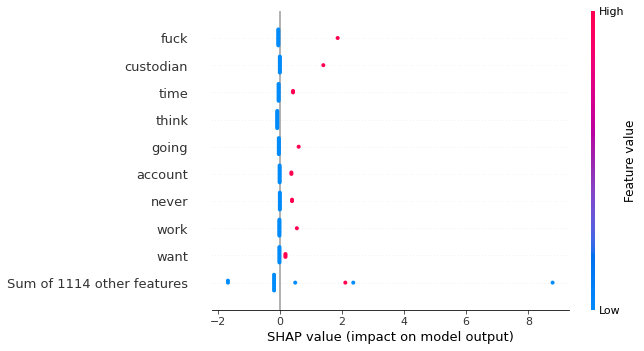

In [24]:
shap.plots.beeswarm(shap_values)

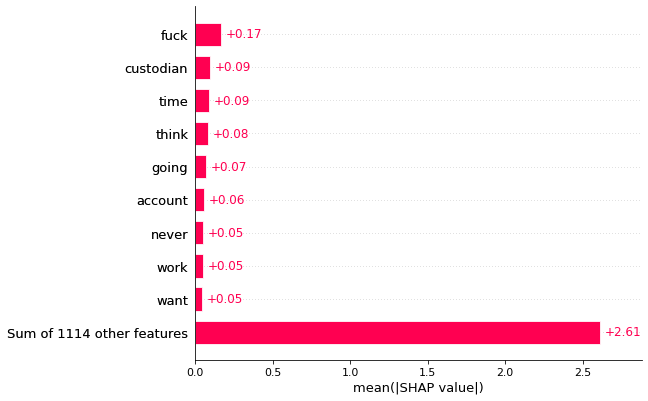

In [25]:
shap.plots.bar(shap_values)